## https://www.guruguru.science/competitions/17/discussions/c91c9c19-a907-4de9-89aa-294542758590/

In [1]:
import os

import pandas as pd
import numpy as np
from glob import  glob

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
input_dir = '/src/atmacup/atmacup11/data/inputs/'
photo_dir = os.path.join(input_dir, 'photos')
photo_pathes = glob(os.path.join(photo_dir, "*.jpg"))
output_dir = '/src/atmacup/atmacup11/data/outputs/'

os.makedirs(output_dir, exist_ok=True)

train_df = pd.read_csv(os.path.join(input_dir, 'train.csv'))
test_df = pd.read_csv(os.path.join(input_dir, 'test.csv'))

material_df = pd.read_csv(os.path.join(input_dir, 'materials.csv'))
technique_df = pd.read_csv(os.path.join(input_dir, 'techniques.csv'))

In [3]:
import re

#pip install ipynb-path
import ipynb_path

class Config:
    N_FOLDS = 5
    N_EPOCHS = 1
    NB_NAME = ''.join(re.findall('.*/(.*).ipynb', ipynb_path.get()))

In [4]:
from typing import List, Optional

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
from tqdm import tqdm

pd.options.display.float_format = '{:.2f}'.format

In [5]:
def get_size_channel(jpg_file: str) -> List[int]:
    '''画像の高さ、幅、チャネル数を取得する。

    Parameters
    ----------
    jpg_file: str
        画像のファイルパス。

    Returns
    -------
    size_channel_info: List[int], length = 3
        [高さ, 幅, チャネル数]
    
    '''
    img = plt.imread(jpg_file)
    return [
        img.shape[0],
        img.shape[1],
        1 if img.ndim < 3 else img.shape[2]
    ]

In [6]:
size_channel_info = []
for jpg_file in tqdm(photo_pathes):
    img = plt.imread(jpg_file)
    assert(img.ndim == 3)
    size_channel_info.append([img.shape[0],
                              img.shape[1],
                              img.shape[2]])

100%|██████████| 9856/9856 [01:11<00:00, 137.43it/s]


In [7]:
size_channel_info

[[169, 224, 3],
 [224, 161, 3],
 [175, 224, 3],
 [109, 224, 3],
 [164, 224, 3],
 [224, 158, 3],
 [224, 152, 3],
 [224, 174, 3],
 [224, 161, 3],
 [224, 132, 3],
 [162, 224, 3],
 [170, 224, 3],
 [224, 137, 3],
 [224, 162, 3],
 [94, 224, 3],
 [224, 176, 3],
 [224, 156, 3],
 [152, 224, 3],
 [176, 224, 3],
 [224, 140, 3],
 [224, 170, 3],
 [224, 221, 3],
 [224, 181, 3],
 [224, 207, 3],
 [224, 182, 3],
 [168, 224, 3],
 [124, 224, 3],
 [224, 176, 3],
 [224, 161, 3],
 [224, 177, 3],
 [178, 224, 3],
 [224, 174, 3],
 [130, 224, 3],
 [176, 224, 3],
 [139, 224, 3],
 [183, 224, 3],
 [224, 190, 3],
 [172, 224, 3],
 [179, 224, 3],
 [191, 224, 3],
 [139, 224, 3],
 [171, 224, 3],
 [155, 224, 3],
 [175, 224, 3],
 [224, 207, 3],
 [224, 134, 3],
 [224, 125, 3],
 [224, 192, 3],
 [163, 224, 3],
 [224, 184, 3],
 [150, 224, 3],
 [150, 224, 3],
 [171, 224, 3],
 [224, 143, 3],
 [224, 149, 3],
 [224, 112, 3],
 [159, 224, 3],
 [224, 170, 3],
 [224, 175, 3],
 [170, 224, 3],
 [224, 176, 3],
 [187, 224, 3],
 [200, 22

In [8]:
df_size_channel = pd.DataFrame(data=size_channel_info,
                               columns=['height', 'width', 'num_channels'])
df_size_channel['filename'] = photo_pathes
df_size_channel.describe()

,height,width,num_channels
count,9856.00,9856.00,9856.00
mean,191.41,194.12,3.00
std,37.69,33.47,0.00
min,35.00,72.00,3.00
25%,158.00,165.00,3.00
50%,224.00,213.00,3.00
75%,224.00,224.00,3.00
max,224.00,224.00,3.00


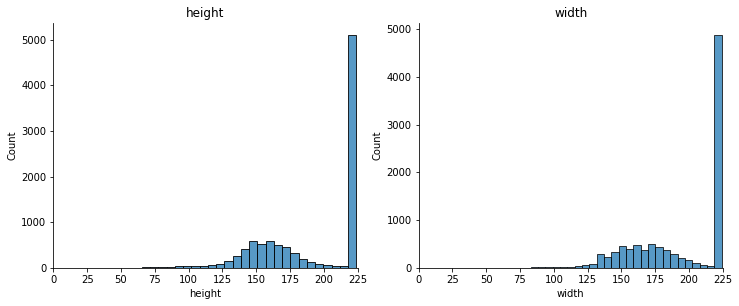

In [9]:
figure = plt.figure(figsize=(12, 4.5))
for i, column in enumerate(['height', 'width']):
    ax = plt.subplot(1, 2, i+1)
    ax.set_title(column)
    ax.set_xlim(0, 225)
    sns.histplot(data=df_size_channel, x=column)
    sns.despine()

In [10]:
train_df

,object_id,sorting_date,art_series_id,target
0,002bff09b09998d0be65,1631,509357f67692a6a45626,1
1,00309fb1ef05416f9c1f,1900,7987b47bbe5dc3039179,3
2,003a1562e97f79ba96dc,1834,ded7c3c9636708e5b14c,3
3,004890880e8e7431147b,1743,582ac2d7f0cef195b605,2
4,00718c32602425f504c1,1885,64c907f0c08dce4fb8e8,3
...,...,...,...,...
3932,ffa3259fff8e6f3818a1,1850,b187c294b0550acf049a,3
3933,ffd4d361756587883e48,1670,ad49a044770a48f860a6,1
3934,ffd794b7b311b7b7fd92,1789,f030a01b480b18a27be2,2
3935,ffe49bba69d06446de7e,1805,f5287bc84a05aada1d17,3


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3937 entries, 0 to 3936
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   object_id      3937 non-null   object
 1   sorting_date   3937 non-null   int64 
 2   art_series_id  3937 non-null   object
 3   target         3937 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 123.2+ KB


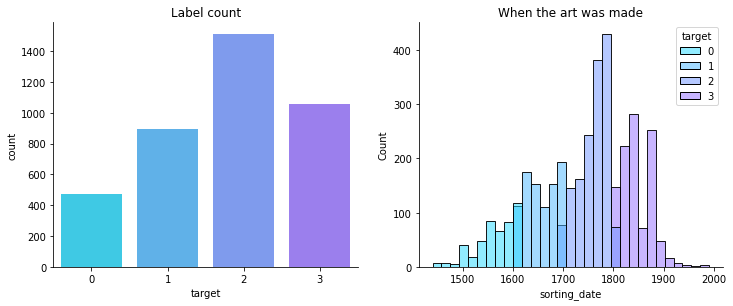

In [12]:
fig = plt.figure(figsize=(12, 4.5))
plt.subplot(1,2,1)
ax = sns.countplot(data=train_df, x='target', palette=sns.color_palette('cool'))
ax.set_title('Label count')

plt.subplot(1,2,2)
ax = sns.histplot(data=train_df, x='sorting_date', hue='target', 
                  palette=sns.color_palette('cool')[:train_df['target'].nunique()])
ax.set_title('When the art was made')
sns.despine()

In [13]:
sorting_date_stat = train_df.groupby('target')['sorting_date'].describe().sort_index()
for column in ('count', 'min', 'max'):
    sorting_date_stat[column] = sorting_date_stat[column].astype(int)
sorting_date_stat

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,475,1563.93,36.92,1440,1542.00,1574.00,1599.00,1600
1,896,1656.53,31.70,1601,1628.00,1655.00,1683.00,1700
2,1511,1760.01,27.40,1701,1741.00,1770.00,1782.00,1800
3,1055,1845.60,29.25,1801,1823.00,1841.00,1870.00,1991


In [15]:
scipy.stats.kstest(train_df['sorting_date'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [17]:
art_series = train_df.groupby('art_series_id')['sorting_date'].describe()

for col in ('count', 'min', 'max'):
    art_series[col] = art_series[col].astype('int')
art_series['range'] = art_series['max'] - art_series['min']
art_series.drop(columns=['std'], inplace=True)

In [18]:
art_series

,count,mean,min,25%,50%,75%,max,range
art_series_id,,,,,,,,
000de75d8dca452ca1ab,1,1874.00,1874,1874.00,1874.00,1874.00,1874,0
00311318c7f6fdc4b71d,1,1805.00,1805,1805.00,1805.00,1805.00,1805,0
0067672f176fe3bf9dad,2,1618.50,1618,1618.25,1618.50,1618.75,1619,1
006fe2b10fa4fe98a2a0,1,1780.00,1780,1780.00,1780.00,1780.00,1780,0
0074f20a528f2593cea8,1,1862.00,1862,1862.00,1862.00,1862.00,1862,0
...,...,...,...,...,...,...,...,...
ffb705a4314e94460d85,1,1741.00,1741,1741.00,1741.00,1741.00,1741,0
ffcec754bfaf4c89c6fa,1,1600.00,1600,1600.00,1600.00,1600.00,1600,0
ffd47c5cbd9995c365c1,1,1680.00,1680,1680.00,1680.00,1680.00,1680,0


,num_art_in_series,num_seies
0,1,3666
1,2,99
2,3,13
3,4,3
4,6,1
5,7,1
6,9,1


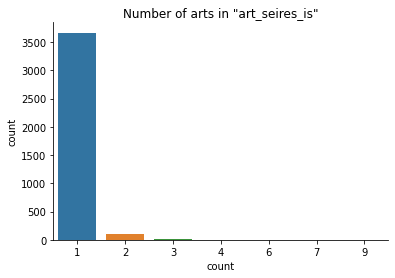

In [24]:
ax = sns.countplot(data=art_series, x='count')
ax.set_title('Number of arts in "art_seires_is"')
sns.despine()
art_series['count'].value_counts().sort_index().reset_index().rename(columns={'index': 'num_art_in_series',
                                                                              'count': 'num_seies'})

In [31]:
art_series['count'].value_counts().sort_index().reset_index()

,index,count
0,1,3666
1,2,99
2,3,13
3,4,3
4,6,1
5,7,1
6,9,1


In [32]:
art_series.sort_values('range', ascending=False)

,count,mean,min,25%,50%,75%,max,range
art_series_id,,,,,,,,
600db76c79a01bc40eb1,4,1662.50,1550,1662.50,1700.00,1700.00,1700,150
9f6b6e88a57613d73742,4,1675.25,1645,1645.00,1645.00,1675.25,1766,121
b869fd8334a3a591084e,2,1607.00,1574,1590.50,1607.00,1623.50,1640,66
eb5c485f9a37311ea34e,3,1750.67,1708,1740.00,1772.00,1772.00,1772,64
767092249ef8adf7cfc9,3,1809.33,1775,1800.00,1825.00,1826.50,1828,53
...,...,...,...,...,...,...,...,...
54677177fc3180411528,1,1679.00,1679,1679.00,1679.00,1679.00,1679,0
54809ac504d6c18f199a,1,1800.00,1800,1800.00,1800.00,1800.00,1800,0
5490ef10a09f1a04a99c,1,1791.00,1791,1791.00,1791.00,1791.00,1791,0


In [71]:
target = "00309fb1ef05416f9c1f"
#train_df.query(f'object_id == {target}')
train_df.query(f"object_id == '{target}'")

,object_id,sorting_date,art_series_id,target
1,00309fb1ef05416f9c1f,1900,7987b47bbe5dc3039179,3


In [72]:
print(f"object_id == '{target}'")
print(f'object_id == {target}')
print(f'object_id == "{target}"')

object_id == '00309fb1ef05416f9c1f'
object_id == 00309fb1ef05416f9c1f
object_id == "00309fb1ef05416f9c1f"


In [88]:
def plot_image(
    object_id: str,
    image_only: bool = False,
    height: int = 5,
    width: int = 5,
    df: Optional[pd.DataFrame] = None
) -> matplotlib.figure.Figure:
    figure = plt.figure(figsize=(width, height))
    img = plt.imread(os.path.join(photo_dir, f'{object_id}.jpg'))
    ax = plt.imshow(img)
    title = f"'{object_id}'"
    if not image_only:
        df = pd.read_csv(os.path.join(input_dir, 'train.csv')) if df is None else df
        df_ = df.query(f"object_id == '{object_id}'")
        sorting_date = 'Unknown(test data)' if df_.shape[0] == 0 else df_.iloc[0]['sorting_date']
        title = title + f'  sorting_date={sorting_date}'
    plt.title(title)
    sns.despine()
    return figure

In [89]:
def plot_series(
    art_series_id: str,
    df: pd.DataFrame,
    height: int = 5,
    width: int = 5,
) -> List[matplotlib.figure.Figure]:
    '''シリーズものの作品を全部表示する。

    複数の作品がある場合 `sorting_date` > `object_id` の順に従って表示する。

    Parameters
    ----------
    art_series_id: str
        シリーズの識別子。train.csv の `art_series_id` を想定。
    df: pd.DataFrame
        `art_series_id` とそれに紐づく `object_id`, `sorting_date` がわかるもの。
    height, width: int
        各作品のグラフ上での高さ、幅。
    '''
    df_ = df[df['art_series_id'] == art_series_id]
    if df_.shape[0] < 1:
        raise ValueError(art_series_id)
    else:        
        figures = [
            plot_image(object_id, height=height, width=width, df=df_)
            for object_id in df_.sort_values(['sorting_date', 'object_id'])['object_id']
        ]
        return 

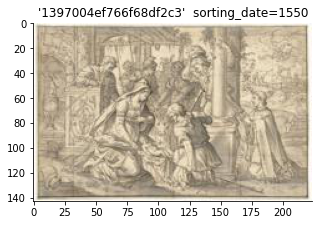

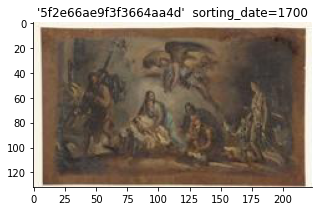

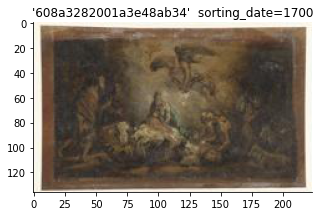

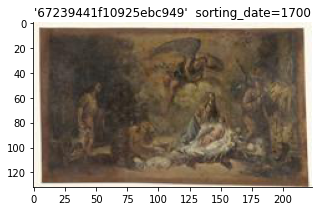

In [90]:
plot_series('600db76c79a01bc40eb1', train_df)

In [91]:
techniques = technique_df

In [92]:
techniques

,name,object_id
0,pen,002bff09b09998d0be65
1,brush,00309fb1ef05416f9c1f
2,counterproof,004890880e8e7431147b
3,brush,007f5e3620b458d77212
4,brush,00bf812ffe8a62d45661
...,...,...
3772,brush,ffd794b7b311b7b7fd92
3773,pen,ffe49bba69d06446de7e
3774,brush,ffe49bba69d06446de7e
3775,pen,ffe77db10be3400bed53


In [94]:
techniques.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3777 entries, 0 to 3776
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       3777 non-null   object
 1   object_id  3777 non-null   object
dtypes: object(2)
memory usage: 59.1+ KB


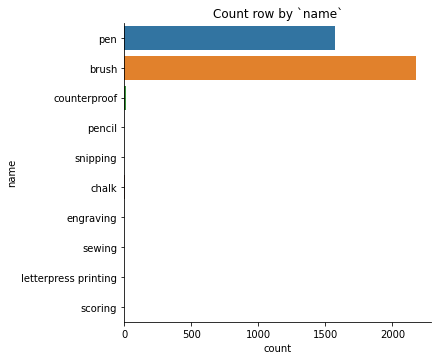

In [95]:
figure = plt.figure(figsize=(5.5, 5.5))
ax = sns.countplot(data=techniques, y='name')
ax.set_title('Count row by `name`')
sns.despine()

In [96]:
#チルダは否定なのでtrain.csv にしか存在しない `object_id`
train_df[~train_df['object_id'].isin(techniques['object_id'])]

,object_id,sorting_date,art_series_id,target
2,003a1562e97f79ba96dc,1834,ded7c3c9636708e5b14c,3
4,00718c32602425f504c1,1885,64c907f0c08dce4fb8e8,3
5,007c091616828798b5e1,1839,e9440b5eb4b77f1ce0e3,3
7,00990614b43285e49f4a,1893,8134b18cdc27af23e1a8,3
9,00c93e990e799fb3d8c9,1775,2d29062fe2b09738757b,2
...,...,...,...,...
3921,fedec46674f75eeebf29,1683,d29a4318878aa4053d9b,1
3923,fefd3c7d2aaf156aa743,1857,0e70675fddb921189c3a,3
3927,ff32f8ea29ea2ec557e6,1831,374dc017e81ba976758e,3
3928,ff37540e22e1ef455368,1765,9971eebf0f583a5e51da,2


In [97]:
train_df[train_df['object_id'].isin(techniques['object_id'])]

,object_id,sorting_date,art_series_id,target
0,002bff09b09998d0be65,1631,509357f67692a6a45626,1
1,00309fb1ef05416f9c1f,1900,7987b47bbe5dc3039179,3
3,004890880e8e7431147b,1743,582ac2d7f0cef195b605,2
6,007f5e3620b458d77212,1640,b869fd8334a3a591084e,1
8,00bf812ffe8a62d45661,1720,3bfd41016d864e3fd8b5,2
...,...,...,...,...
3932,ffa3259fff8e6f3818a1,1850,b187c294b0550acf049a,3
3933,ffd4d361756587883e48,1670,ad49a044770a48f860a6,1
3934,ffd794b7b311b7b7fd92,1789,f030a01b480b18a27be2,2
3935,ffe49bba69d06446de7e,1805,f5287bc84a05aada1d17,3


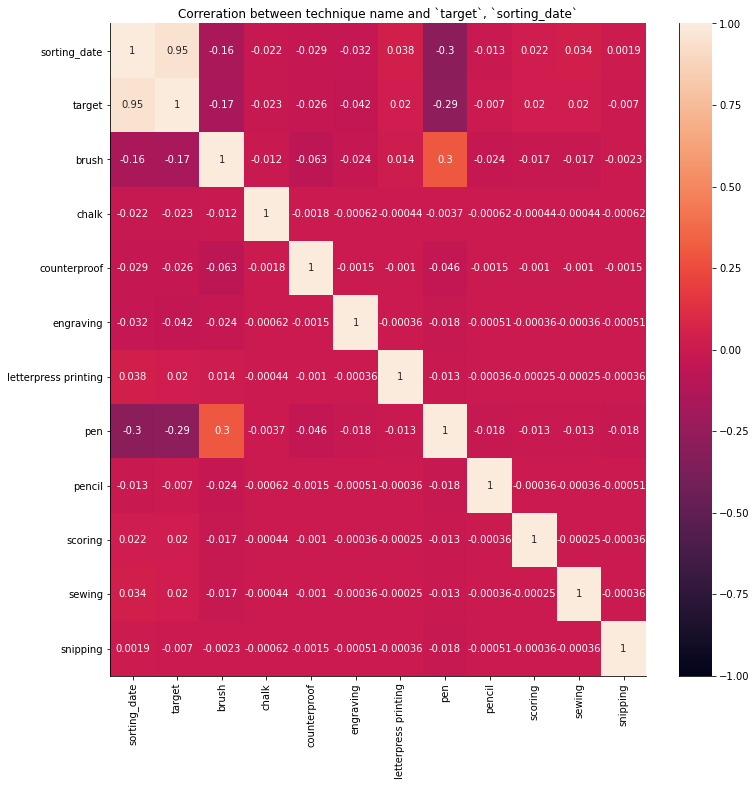

In [100]:
tech_table = pd.crosstab(techniques['object_id'], techniques['name']).reset_index()
train_wz_tech = pd.merge(train_df, tech_table, how='left', on='object_id').fillna(0)
for column in tech_table.columns:
    if column == 'object_id': continue
    train_wz_tech[column] = train_wz_tech[column].astype('int')
figure = plt.figure(figsize=(12, 12))
ax = sns.heatmap(train_wz_tech.corr(), vmin=-1, vmax=1, annot=True)
ax.set_title('Correration between technique name and `target`, `sorting_date`')
sns.despine()

In [101]:
tech_table

name,object_id,brush,chalk,counterproof,engraving,letterpress printing,pen,pencil,scoring,sewing,snipping
0,002bff09b09998d0be65,0,0,0,0,0,1,0,0,0,0
1,00309fb1ef05416f9c1f,1,0,0,0,0,0,0,0,0,0
2,004890880e8e7431147b,0,0,1,0,0,0,0,0,0,0
3,007f5e3620b458d77212,1,0,0,0,0,0,0,0,0,0
4,00bf812ffe8a62d45661,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2561,ffa3259fff8e6f3818a1,1,0,0,0,0,1,0,0,0,0
2562,ffd4d361756587883e48,1,0,0,0,0,1,0,0,0,0
2563,ffd794b7b311b7b7fd92,1,0,0,0,0,0,0,0,0,0
2564,ffe49bba69d06446de7e,1,0,0,0,0,1,0,0,0,0


In [102]:
materials = material_df

In [104]:
materials

,name,object_id
0,ink,002bff09b09998d0be65
1,paper,002bff09b09998d0be65
2,pencil,002bff09b09998d0be65
3,watercolor (paint),00309fb1ef05416f9c1f
4,paper,00309fb1ef05416f9c1f
...,...,...
9076,ink,ffe49bba69d06446de7e
9077,paper,ffe49bba69d06446de7e
9078,paper,ffe77db10be3400bed53
9079,ink,ffe77db10be3400bed53


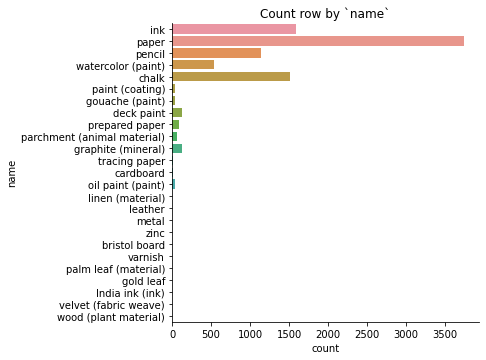

In [105]:
figure = plt.figure(figsize=(5.5, 5.5))
ax = sns.countplot(data=materials, y='name')
ax.set_title('Count row by `name`')
sns.despine()

In [107]:
train_df[~train_df['object_id'].isin(materials['object_id'])] 

,object_id,sorting_date,art_series_id,target
1468,60c1cacb453d497ad3a4,1700,7082ba275d243b0ab7d2,1


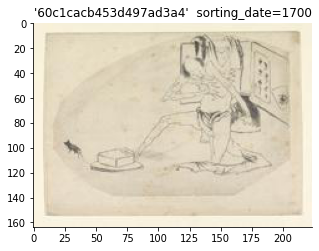

In [108]:
plot_image("60c1cacb453d497ad3a4");

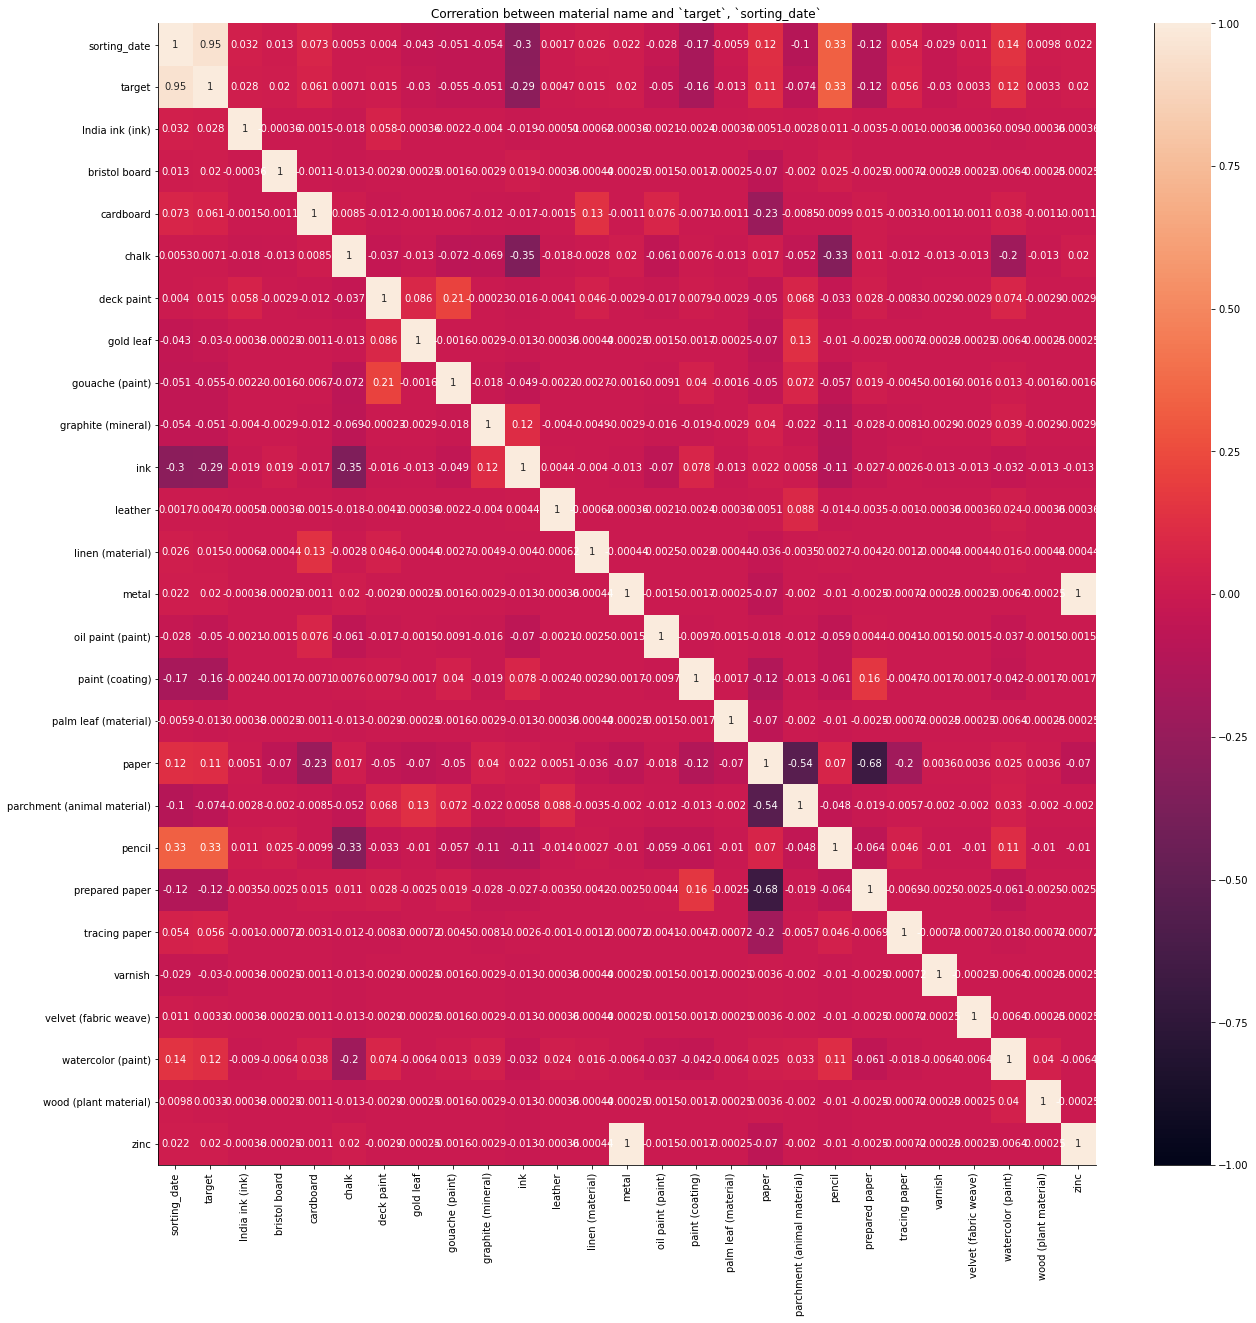

In [110]:
material_table = pd.crosstab(materials['object_id'], materials['name']).reset_index()
train_wz_material = pd.merge(train_df, material_table, how='left', on='object_id').fillna(0)
for column in material_table.columns:
    if column == 'object_id': continue
    train_wz_material[column] = train_wz_material[column].astype('int')
figure = plt.figure(figsize=(21, 21))
ax = sns.heatmap(train_wz_material.corr(), vmin=-1, vmax=1, annot=True)
ax.set_title('Correration between material name and `target`, `sorting_date`')
sns.despine()